# Cirrhosis Prediction

### Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as smi
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_error
from sklearn.metrics import classification_report
from tabulate import tabulate
from sklearn.metrics import confusion_matrix
import warnings
from sklearn.feature_selection import f_regression
warnings.simplefilter('ignore')

### Data Preprocesing

In [18]:
df = pd.read_csv(r'C:/Users/PC/Desktop/ML/Data/cirrhosis.csv')
df.head(5)

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

In [4]:
df.describe()

,ID,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,418.000000,418.000000,418.000000,418.000000,284.000000,418.000000,310.000000,312.000000,312.000000,282.000000,407.000000,416.000000,412.000000
mean,209.500000,1917.782297,18533.351675,3.220813,369.510563,3.497440,97.648387,1982.655769,122.556346,124.702128,257.024570,10.731731,3.024272
std,120.810458,1104.672992,3815.845055,4.407506,231.944545,0.424972,85.613920,2140.388824,56.699525,65.148639,98.325585,1.022000,0.882042
min,1.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,105.250000,1092.750000,15644.500000,0.800000,249.500000,3.242500,41.250000,871.500000,80.600000,84.250000,188.500000,10.000000,2.000000
50%,209.500000,1730.000000,18628.000000,1.400000,309.500000,3.530000,73.000000,1259.000000,114.700000,108.000000,251.000000,10.600000,3.000000
75%,313.750000,2613.500000,21272.500000,3.400000,400.000000,3.770000,123.000000,1980.000000,151.900000,151.000000,318.000000,11.100000,4.000000
max,418.000000,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,4.000000


In [5]:
df.mean()

ID                 209.500000
N_Days            1917.782297
Age              18533.351675
Bilirubin            3.220813
Cholesterol        369.510563
Albumin              3.497440
Copper              97.648387
Alk_Phos          1982.655769
SGOT               122.556346
Tryglicerides      124.702128
Platelets          257.024570
Prothrombin         10.731731
Stage                3.024272
dtype: float64

In [6]:
df.median()

ID                 209.50
N_Days            1730.00
Age              18628.00
Bilirubin            1.40
Cholesterol        309.50
Albumin              3.53
Copper              73.00
Alk_Phos          1259.00
SGOT               114.70
Tryglicerides      108.00
Platelets          251.00
Prothrombin         10.60
Stage                3.00
dtype: float64

In [7]:
df.skew()

ID               0.000000
N_Days           0.472602
Age              0.086850
Bilirubin        2.717611
Cholesterol      3.408526
Albumin         -0.467527
Copper           2.303640
Alk_Phos         2.992834
SGOT             1.449197
Tryglicerides    2.523902
Platelets        0.627098
Prothrombin      2.223276
Stage           -0.496273
dtype: float64

In [15]:
df.isnull().sum()

ID                 0
N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

In [19]:
df = df.dropna()

In [20]:
df.columns

Index(['ID', 'N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites',
       'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol',
       'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets',
       'Prothrombin', 'Stage'],
      dtype='object')

In [21]:
df.shape

(276, 20)

### Exploratory Data Analysis

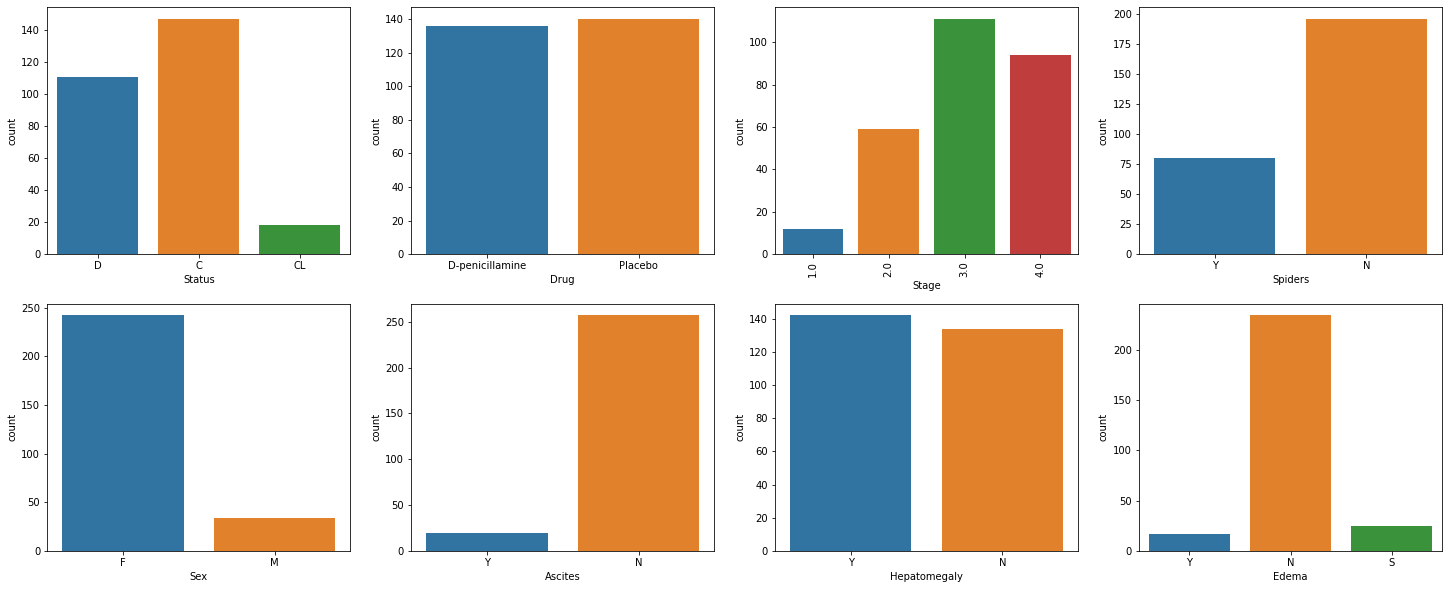

In [25]:
fig, ax = plt.subplots(2, 4, figsize=(25, 10))

sns.countplot(data = df, x ='Status', ax=ax[0,0])
sns.countplot(data = df, x ='Drug', ax=ax[0,1])
sns.countplot(data = df, x ='Stage', ax=ax[0,2])
sns.countplot(data = df, x ='Sex', ax=ax[1,0])
sns.countplot(data = df, x ='Ascites', ax=ax[1,1])
sns.countplot(data = df, x ='Hepatomegaly', ax=ax[1,2])
sns.countplot(data = df, x ='Spiders', ax=ax[0,3])
sns.countplot(data = df, x ='Edema', ax=ax[1,3])

ax[0, 2].set_xticklabels(ax[0, 2].get_xticklabels(), rotation=90)

plt.show()  

In [ ]:
df.boxplot(figsize = (15,5), grid = False)
plt.show()

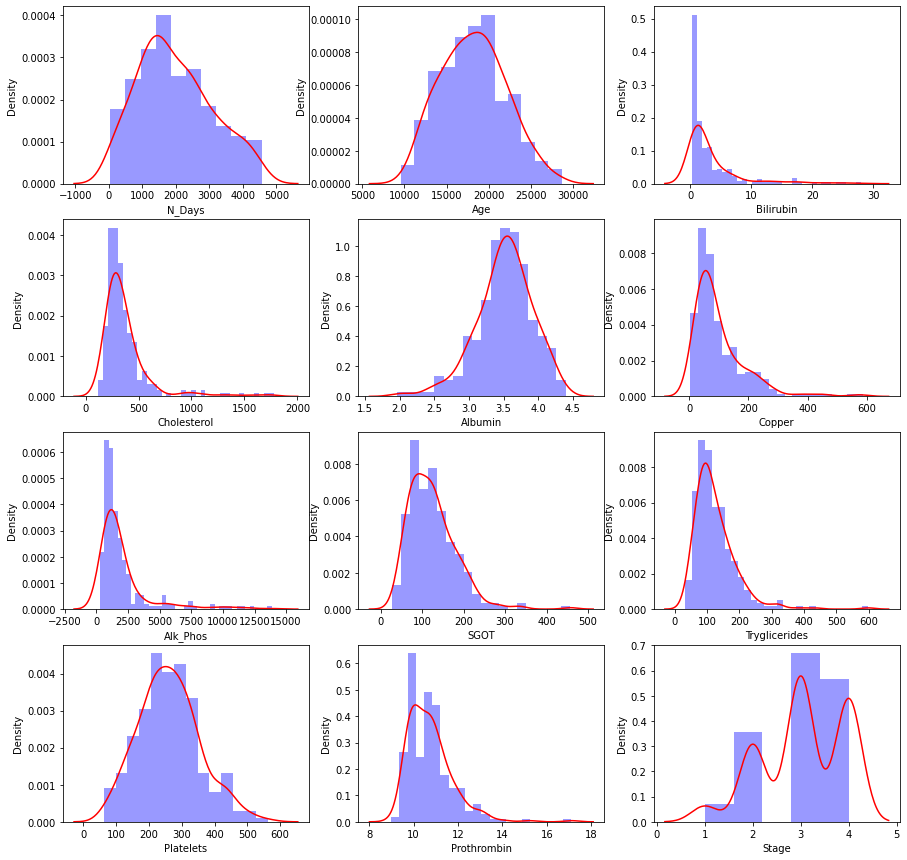

In [29]:
fig, ax = plt.subplots(4, 3, figsize=(15, 15))

sns.distplot(df['N_Days'],ax=ax[0,0], color = 'red', hist_kws={'color': 'blue'})
sns.distplot(df['Age'],ax=ax[0,1],  color = 'red', hist_kws={'color': 'blue'})
sns.distplot(df['Bilirubin'],ax=ax[0,2],  color = 'red', hist_kws={'color': 'blue'})
sns.distplot(df['Cholesterol'],ax=ax[1,0],  color = 'red', hist_kws={'color': 'blue'})
sns.distplot(df['Albumin'],ax=ax[1,1],  color = 'red', hist_kws={'color': 'blue'})
sns.distplot(df['Copper'],ax=ax[1,2],  color = 'red', hist_kws={'color': 'blue'})
sns.distplot(df['Alk_Phos'],ax=ax[2,0],  color = 'red', hist_kws={'color': 'blue'})
sns.distplot(df['SGOT'],ax=ax[2,1],  color = 'red', hist_kws={'color': 'blue'})
sns.distplot(df['Tryglicerides'],ax=ax[2,2],  color = 'red', hist_kws={'color': 'blue'})
sns.distplot(df['Platelets'],ax=ax[3,0],  color = 'red', hist_kws={'color': 'blue'})
sns.distplot(df['Prothrombin'],ax=ax[3,1],  color = 'red', hist_kws={'color': 'blue'})
sns.distplot(df['Stage'],ax=ax[3,2],  color = 'red', hist_kws={'color': 'blue'})

plt.show()

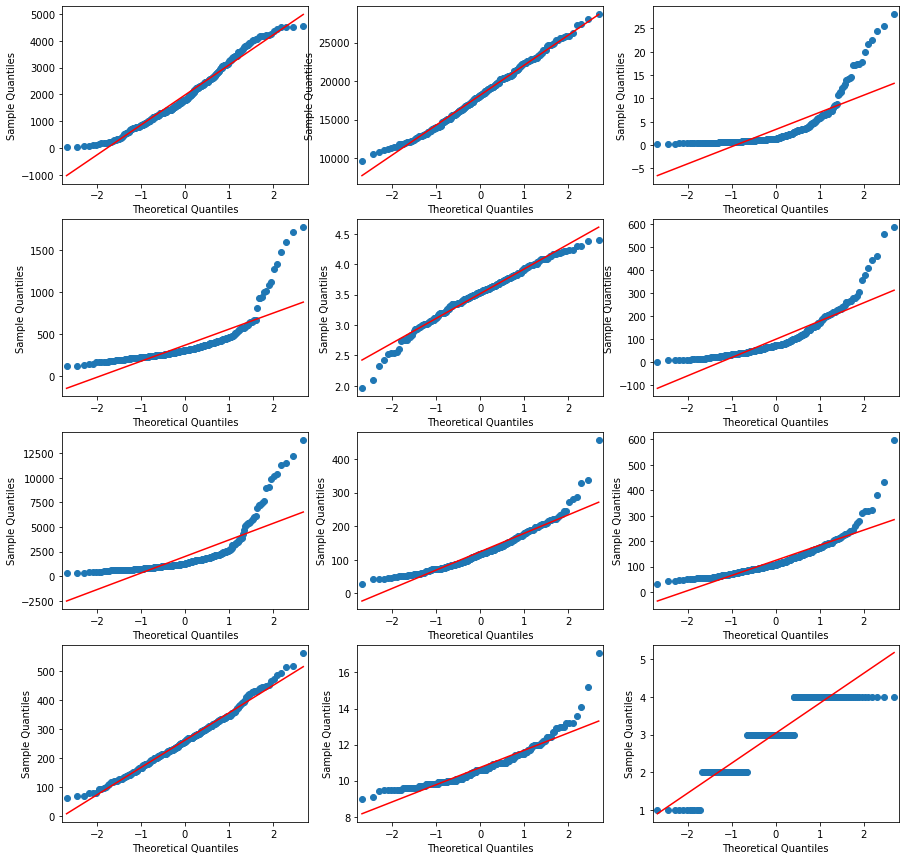

In [31]:
fig, ax = plt.subplots(4, 3, figsize=(15, 15))

smi.qqplot(df['N_Days'],ax=ax[0,0], line = 'r')
smi.qqplot(df['Age'],ax=ax[0,1],  line = 'r')
smi.qqplot(df['Bilirubin'],ax=ax[0,2],  line = 'r')
smi.qqplot(df['Cholesterol'],ax=ax[1,0],  line = 'r')
smi.qqplot(df['Albumin'],ax=ax[1,1],  line = 'r')
smi.qqplot(df['Copper'],ax=ax[1,2],  line = 'r')
smi.qqplot(df['Alk_Phos'],ax=ax[2,0],  line = 'r')
smi.qqplot(df['SGOT'],ax=ax[2,1],  line = 'r')
smi.qqplot(df['Tryglicerides'],ax=ax[2,2],  line = 'r')
smi.qqplot(df['Platelets'],ax=ax[3,0],  line = 'r')
smi.qqplot(df['Prothrombin'],ax=ax[3,1],  line = 'r')
smi.qqplot(df['Stage'],ax=ax[3,2],  line = 'r')

plt.show()

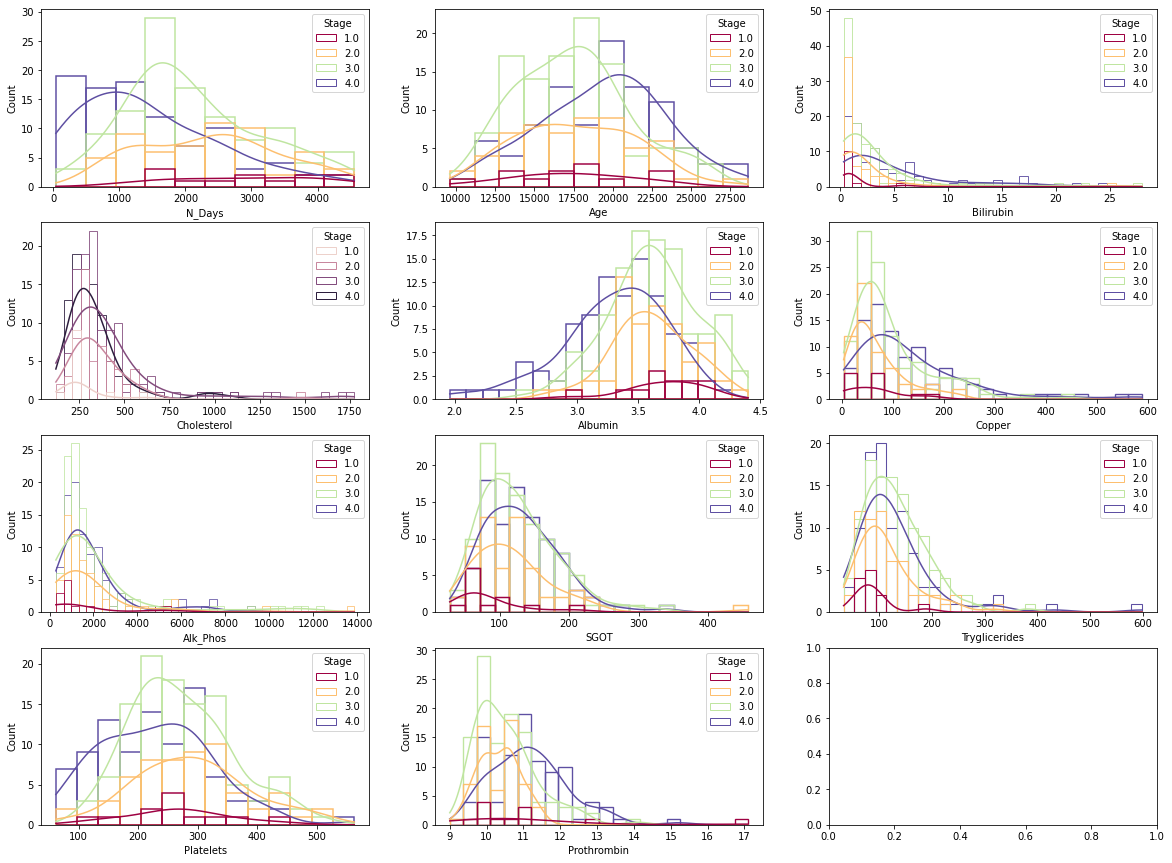

In [66]:
fig, ax = plt.subplots(4, 3, figsize=(20, 15))

sns.histplot(data = df, x = 'N_Days',ax=ax[0,0], hue='Stage',fill=False, kde=True,palette='Spectral')
sns.histplot(data =df, x = 'Age',ax=ax[0,1],  hue='Stage',fill=False, kde=True,palette='Spectral')
sns.histplot(data =df, x = 'Bilirubin',ax=ax[0,2],  hue='Stage',fill=False, kde=True,palette='Spectral')
sns.histplot(data =df, x = 'Cholesterol',ax=ax[1,0], hue='Stage',fill=False, kde=True)
sns.histplot(data =df, x = 'Albumin',ax=ax[1,1],   hue='Stage',fill=False, kde=True,palette='Spectral')
sns.histplot(data =df, x = 'Copper',ax=ax[1,2],   hue='Stage',fill=False, kde=True,palette='Spectral')
sns.histplot(data =df, x = 'Alk_Phos',ax=ax[2,0],  hue='Stage',fill=False, kde=True,palette='Spectral')
sns.histplot(data =df, x = 'SGOT',ax=ax[2,1],   hue='Stage',fill=False, kde=True,palette='Spectral')
sns.histplot(data =df, x = 'Tryglicerides',ax=ax[2,2], hue='Stage',fill=False, kde=True,palette='Spectral')
sns.histplot(data =df, x = 'Platelets',ax=ax[3,0],   hue='Stage',fill=False, kde=True,palette='Spectral')
sns.histplot(data =df, x = 'Prothrombin',ax=ax[3,1],  hue='Stage',fill=False, kde=True,palette='Spectral')

plt.show()

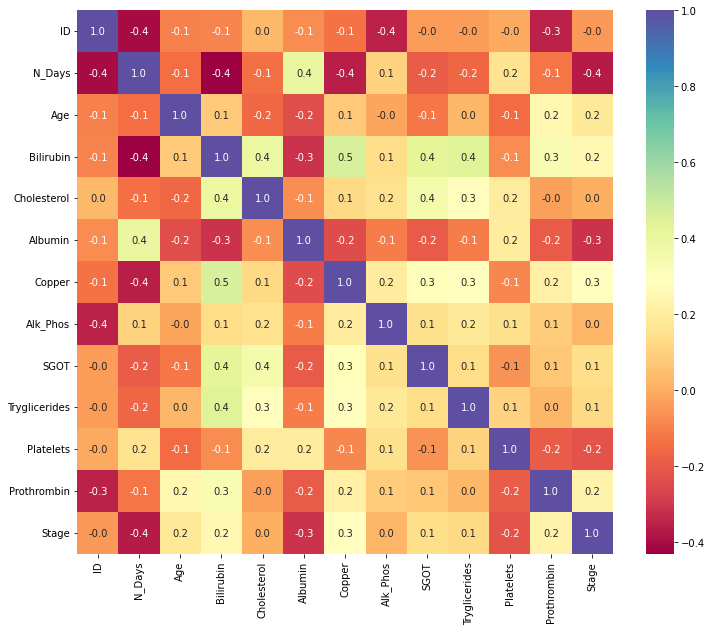

In [32]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot = True, fmt = '.1f', cmap = 'Spectral')
plt.show()

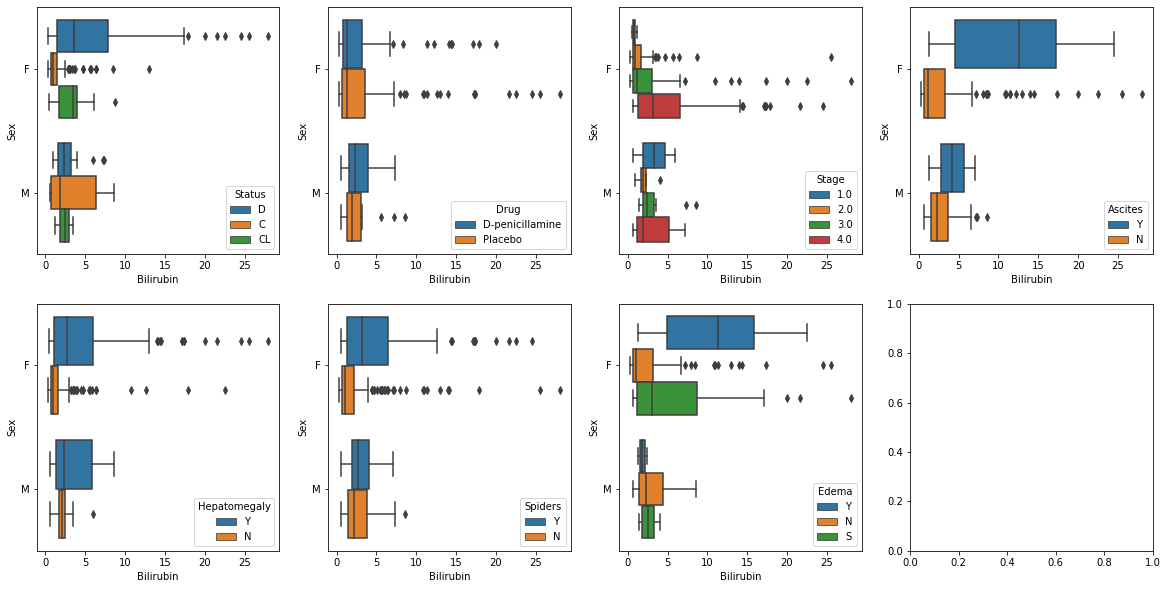

In [52]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))

sns.boxplot(data = df, x ='Bilirubin', y='Sex', hue = 'Status',ax=ax[0,0])
sns.boxplot(data = df, x ='Bilirubin', y='Sex', hue = 'Drug',ax=ax[0,1])
sns.boxplot(data = df, x ='Bilirubin', y='Sex', hue = 'Stage',ax=ax[0,2])
sns.boxplot(data = df, x ='Bilirubin', y='Sex', hue = 'Ascites',ax=ax[0,3])
sns.boxplot(data = df, x ='Bilirubin', y='Sex', hue = 'Hepatomegaly',ax=ax[1,0])
sns.boxplot(data = df, x ='Bilirubin', y='Sex', hue = 'Spiders',ax=ax[1,1])
sns.boxplot(data = df, x ='Bilirubin', y='Sex', hue = 'Edema',ax=ax[1,2])

plt.show()

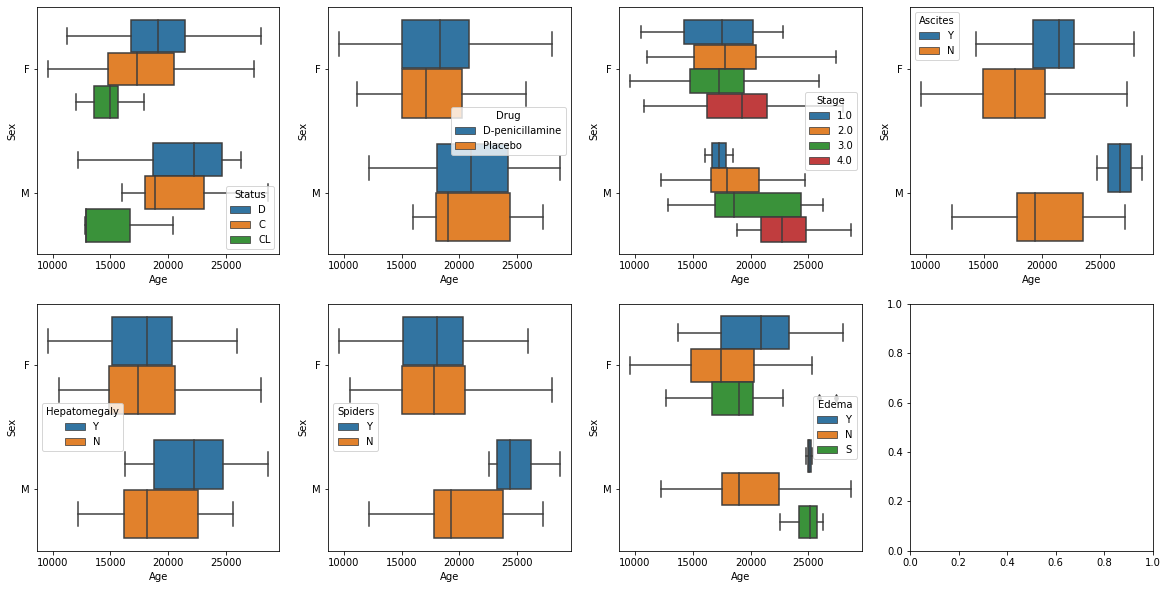

In [53]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))

sns.boxplot(data = df, x ='Age', y='Sex', hue = 'Status',ax=ax[0,0])
sns.boxplot(data = df, x ='Age', y='Sex', hue = 'Drug',ax=ax[0,1])
sns.boxplot(data = df, x ='Age', y='Sex', hue = 'Stage',ax=ax[0,2])
sns.boxplot(data = df, x ='Age', y='Sex', hue = 'Ascites',ax=ax[0,3])
sns.boxplot(data = df, x ='Age', y='Sex', hue = 'Hepatomegaly',ax=ax[1,0])
sns.boxplot(data = df, x ='Age', y='Sex', hue = 'Spiders',ax=ax[1,1])
sns.boxplot(data = df, x ='Age', y='Sex', hue = 'Edema',ax=ax[1,2])

plt.show()

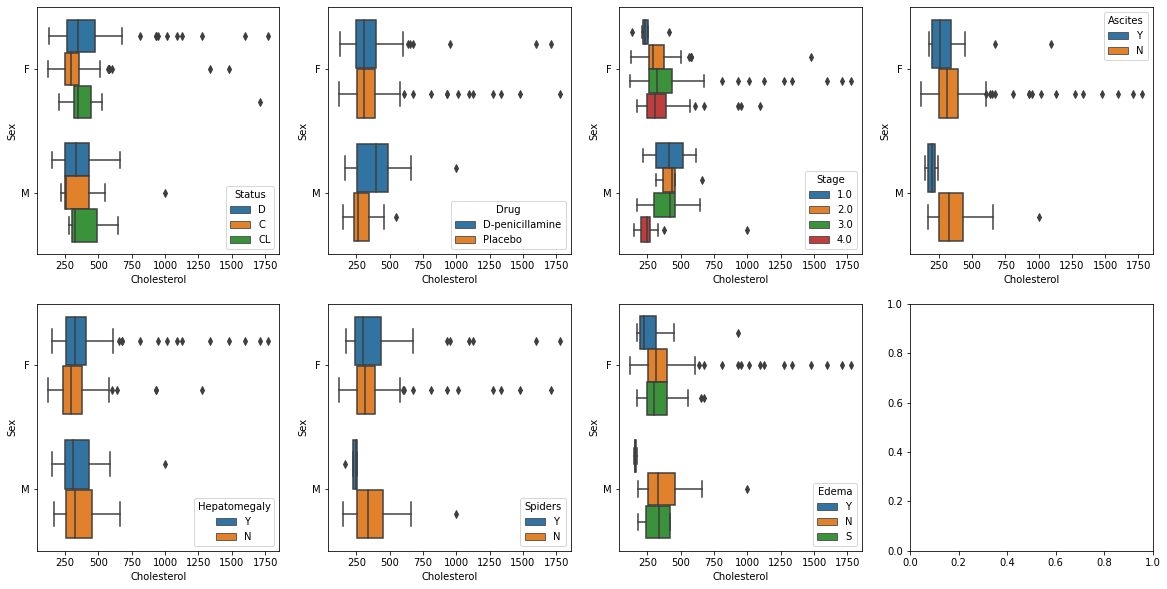

In [54]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))

sns.boxplot(data = df, x ='Cholesterol', y='Sex', hue = 'Status',ax=ax[0,0])
sns.boxplot(data = df, x ='Cholesterol', y='Sex', hue = 'Drug',ax=ax[0,1])
sns.boxplot(data = df, x ='Cholesterol', y='Sex', hue = 'Stage',ax=ax[0,2])
sns.boxplot(data = df, x ='Cholesterol', y='Sex', hue = 'Ascites',ax=ax[0,3])
sns.boxplot(data = df, x ='Cholesterol', y='Sex', hue = 'Hepatomegaly',ax=ax[1,0])
sns.boxplot(data = df, x ='Cholesterol', y='Sex', hue = 'Spiders',ax=ax[1,1])
sns.boxplot(data = df, x ='Cholesterol', y='Sex', hue = 'Edema',ax=ax[1,2])

plt.show()

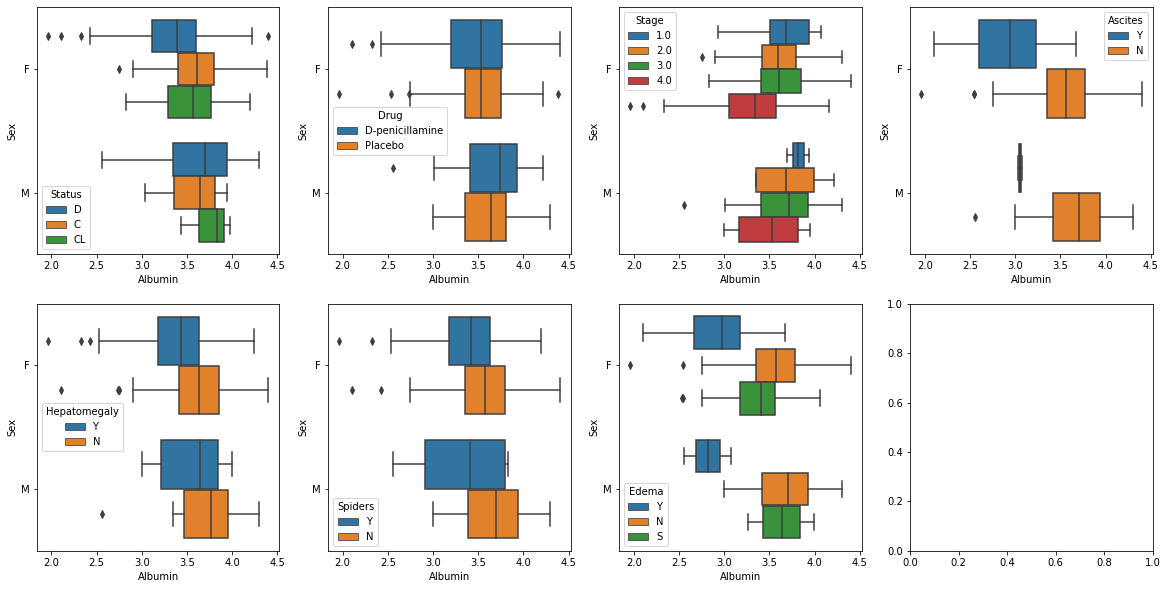

In [55]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))

sns.boxplot(data = df, x ='Albumin', y='Sex', hue = 'Status',ax=ax[0,0])
sns.boxplot(data = df, x ='Albumin', y='Sex', hue = 'Drug',ax=ax[0,1])
sns.boxplot(data = df, x ='Albumin', y='Sex', hue = 'Stage',ax=ax[0,2])
sns.boxplot(data = df, x ='Albumin', y='Sex', hue = 'Ascites',ax=ax[0,3])
sns.boxplot(data = df, x ='Albumin', y='Sex', hue = 'Hepatomegaly',ax=ax[1,0])
sns.boxplot(data = df, x ='Albumin', y='Sex', hue = 'Spiders',ax=ax[1,1])
sns.boxplot(data = df, x ='Albumin', y='Sex', hue = 'Edema',ax=ax[1,2])

plt.show()

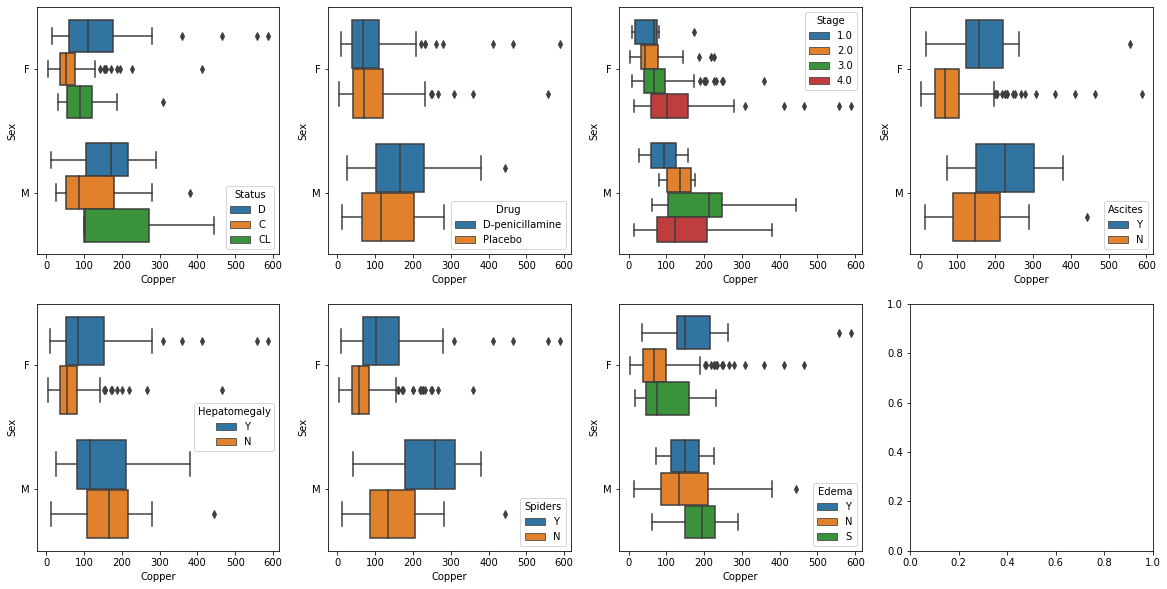

In [56]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))

sns.boxplot(data = df, x ='Copper', y='Sex', hue = 'Status',ax=ax[0,0])
sns.boxplot(data = df, x ='Copper', y='Sex', hue = 'Drug',ax=ax[0,1])
sns.boxplot(data = df, x ='Copper', y='Sex', hue = 'Stage',ax=ax[0,2])
sns.boxplot(data = df, x ='Copper', y='Sex', hue = 'Ascites',ax=ax[0,3])
sns.boxplot(data = df, x ='Copper', y='Sex', hue = 'Hepatomegaly',ax=ax[1,0])
sns.boxplot(data = df, x ='Copper', y='Sex', hue = 'Spiders',ax=ax[1,1])
sns.boxplot(data = df, x ='Copper', y='Sex', hue = 'Edema',ax=ax[1,2])

plt.show()

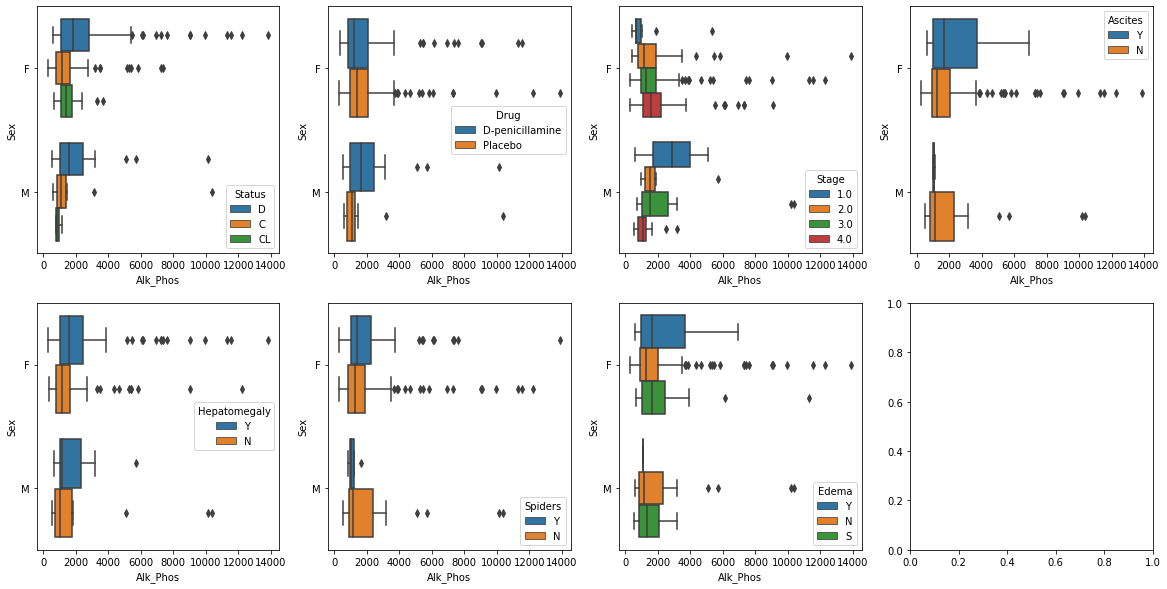

In [57]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))

sns.boxplot(data = df, x ='Alk_Phos', y='Sex', hue = 'Status',ax=ax[0,0])
sns.boxplot(data = df, x ='Alk_Phos', y='Sex', hue = 'Drug',ax=ax[0,1])
sns.boxplot(data = df, x ='Alk_Phos', y='Sex', hue = 'Stage',ax=ax[0,2])
sns.boxplot(data = df, x ='Alk_Phos', y='Sex', hue = 'Ascites',ax=ax[0,3])
sns.boxplot(data = df, x ='Alk_Phos', y='Sex', hue = 'Hepatomegaly',ax=ax[1,0])
sns.boxplot(data = df, x ='Alk_Phos', y='Sex', hue = 'Spiders',ax=ax[1,1])
sns.boxplot(data = df, x ='Alk_Phos', y='Sex', hue = 'Edema',ax=ax[1,2])

plt.show()

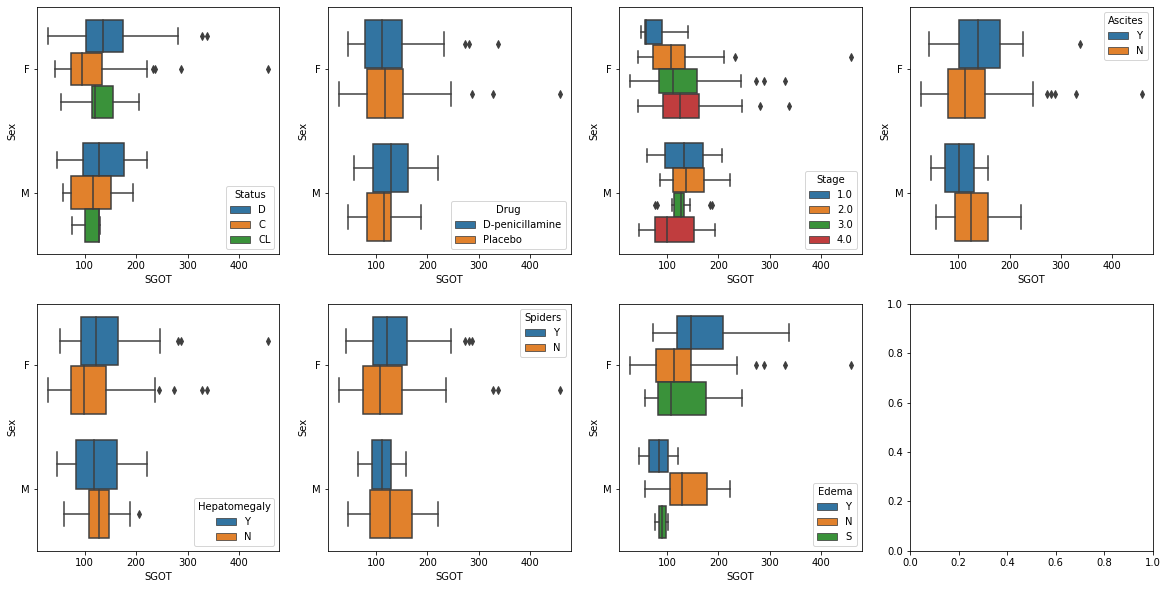

In [58]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))

sns.boxplot(data = df, x ='SGOT', y='Sex', hue = 'Status',ax=ax[0,0])
sns.boxplot(data = df, x ='SGOT', y='Sex', hue = 'Drug',ax=ax[0,1])
sns.boxplot(data = df, x ='SGOT', y='Sex', hue = 'Stage',ax=ax[0,2])
sns.boxplot(data = df, x ='SGOT', y='Sex', hue = 'Ascites',ax=ax[0,3])
sns.boxplot(data = df, x ='SGOT', y='Sex', hue = 'Hepatomegaly',ax=ax[1,0])
sns.boxplot(data = df, x ='SGOT', y='Sex', hue = 'Spiders',ax=ax[1,1])
sns.boxplot(data = df, x ='SGOT', y='Sex', hue = 'Edema',ax=ax[1,2])

plt.show()

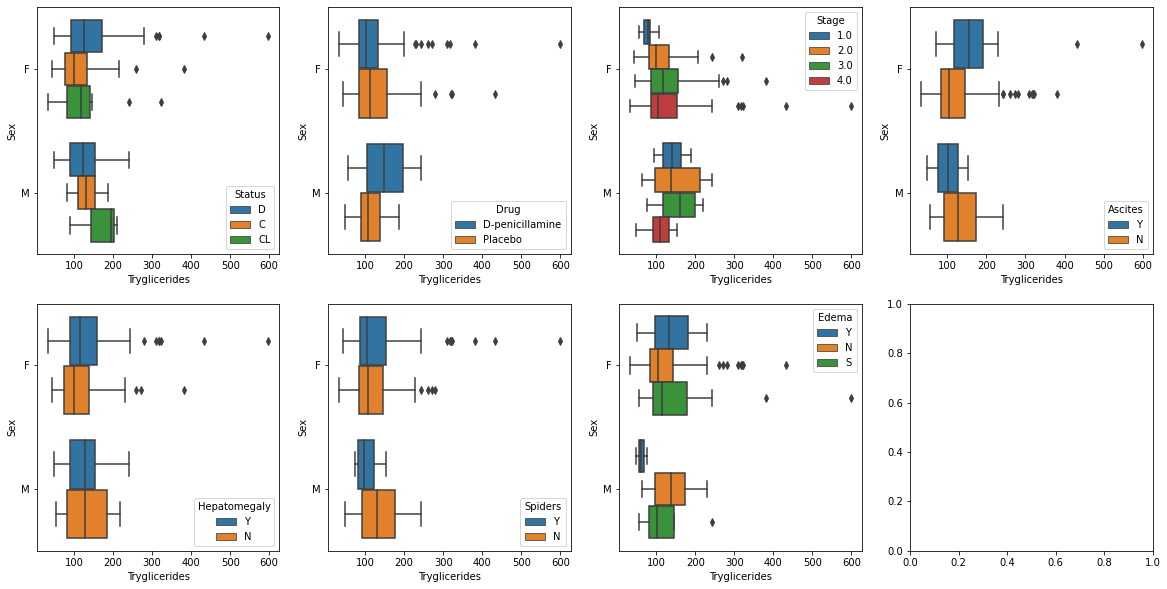

In [59]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))

sns.boxplot(data = df, x ='Tryglicerides', y='Sex', hue = 'Status',ax=ax[0,0])
sns.boxplot(data = df, x ='Tryglicerides', y='Sex', hue = 'Drug',ax=ax[0,1])
sns.boxplot(data = df, x ='Tryglicerides', y='Sex', hue = 'Stage',ax=ax[0,2])
sns.boxplot(data = df, x ='Tryglicerides', y='Sex', hue = 'Ascites',ax=ax[0,3])
sns.boxplot(data = df, x ='Tryglicerides', y='Sex', hue = 'Hepatomegaly',ax=ax[1,0])
sns.boxplot(data = df, x ='Tryglicerides', y='Sex', hue = 'Spiders',ax=ax[1,1])
sns.boxplot(data = df, x ='Tryglicerides', y='Sex', hue = 'Edema',ax=ax[1,2])

plt.show()

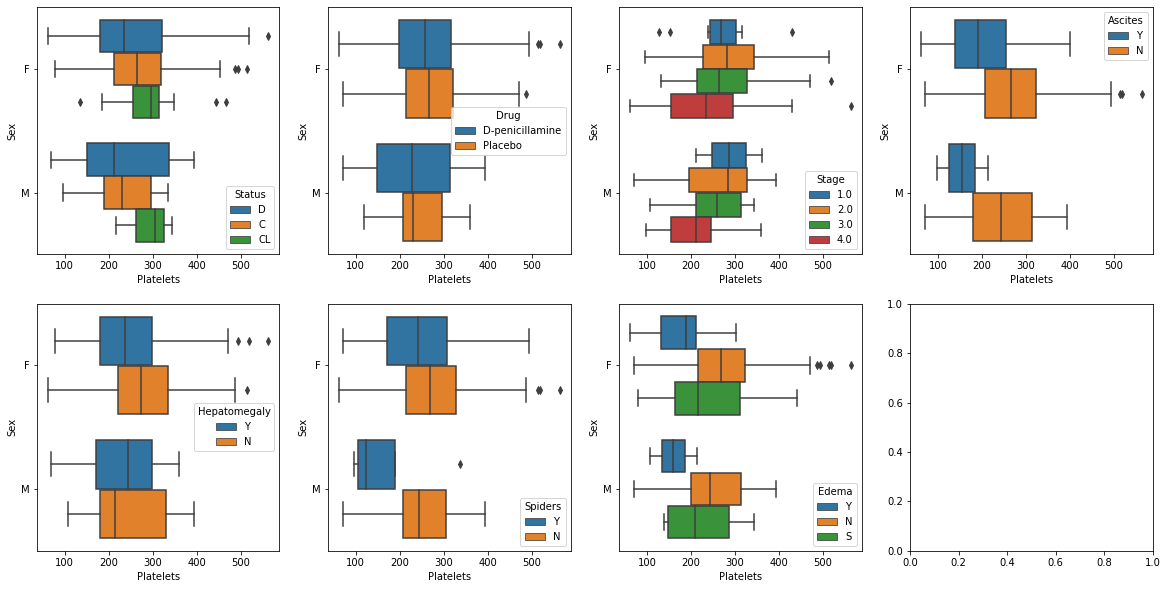

In [60]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))

sns.boxplot(data = df, x ='Platelets', y='Sex', hue = 'Status',ax=ax[0,0])
sns.boxplot(data = df, x ='Platelets', y='Sex', hue = 'Drug',ax=ax[0,1])
sns.boxplot(data = df, x ='Platelets', y='Sex', hue = 'Stage',ax=ax[0,2])
sns.boxplot(data = df, x ='Platelets', y='Sex', hue = 'Ascites',ax=ax[0,3])
sns.boxplot(data = df, x ='Platelets', y='Sex', hue = 'Hepatomegaly',ax=ax[1,0])
sns.boxplot(data = df, x ='Platelets', y='Sex', hue = 'Spiders',ax=ax[1,1])
sns.boxplot(data = df, x ='Platelets', y='Sex', hue = 'Edema',ax=ax[1,2])

plt.show()

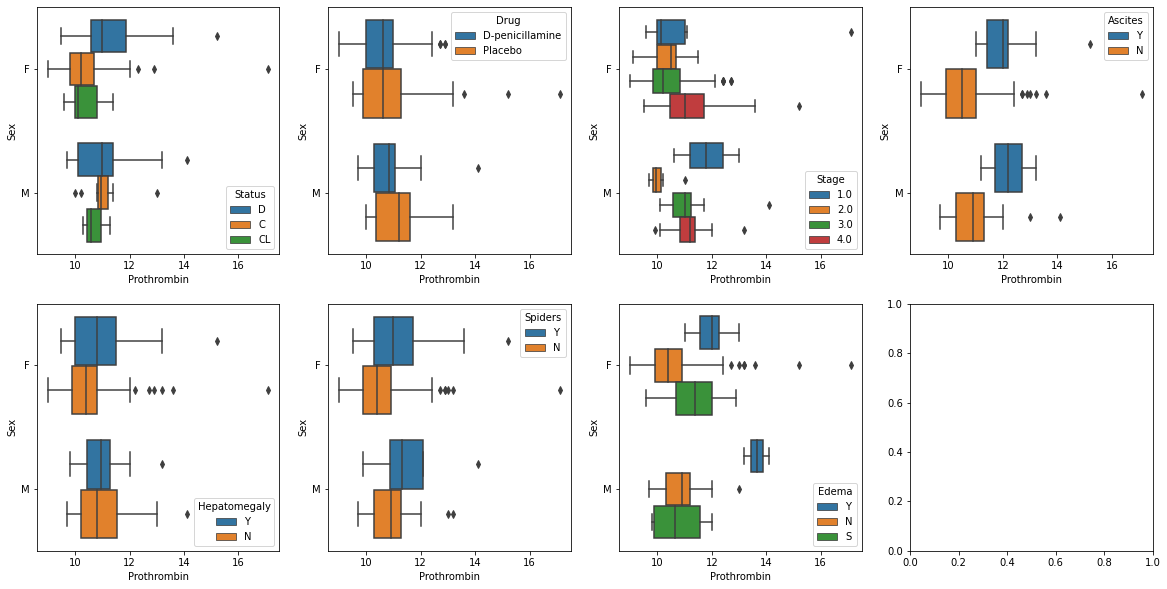

In [61]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))

sns.boxplot(data = df, x ='Prothrombin', y='Sex', hue = 'Status',ax=ax[0,0])
sns.boxplot(data = df, x ='Prothrombin', y='Sex', hue = 'Drug',ax=ax[0,1])
sns.boxplot(data = df, x ='Prothrombin', y='Sex', hue = 'Stage',ax=ax[0,2])
sns.boxplot(data = df, x ='Prothrombin', y='Sex', hue = 'Ascites',ax=ax[0,3])
sns.boxplot(data = df, x ='Prothrombin', y='Sex', hue = 'Hepatomegaly',ax=ax[1,0])
sns.boxplot(data = df, x ='Prothrombin', y='Sex', hue = 'Spiders',ax=ax[1,1])
sns.boxplot(data = df, x ='Prothrombin', y='Sex', hue = 'Edema',ax=ax[1,2])

plt.show()

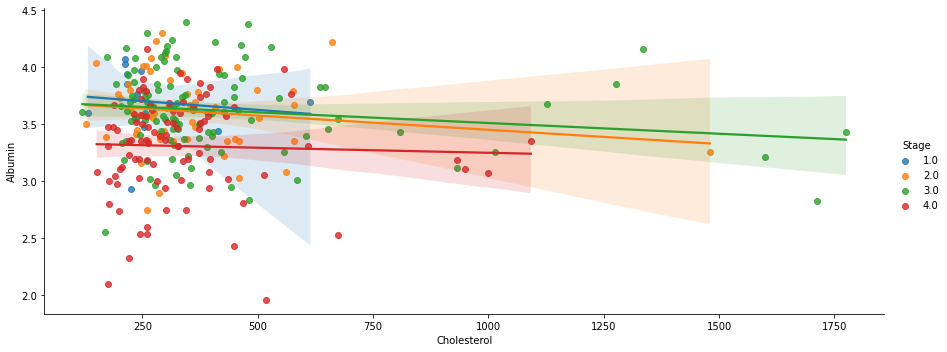

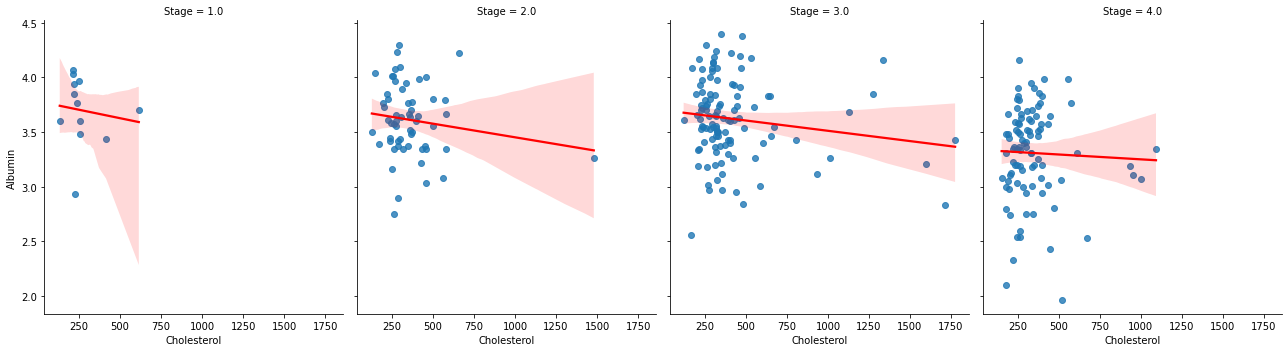

In [67]:
sns.lmplot(data=df, x='Cholesterol', y='Albumin', hue='Stage', aspect=2.5)
sns.lmplot(data=df, x='Cholesterol', y='Albumin', col ='Stage', aspect=0.9, line_kws={'color': 'red'})

plt.show()

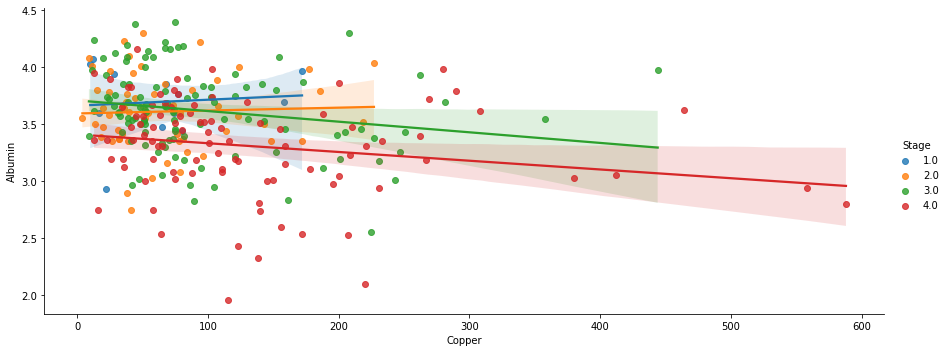

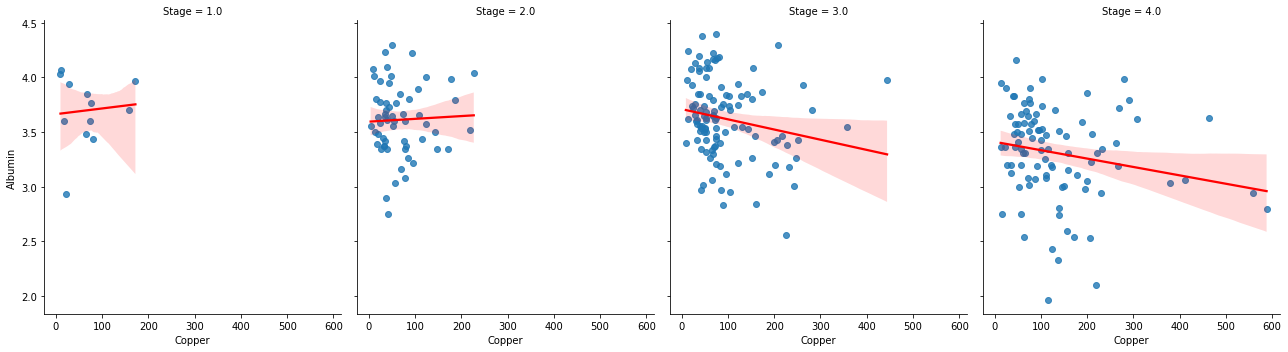

In [68]:
sns.lmplot(data=df, x='Copper', y='Albumin', hue='Stage', aspect=2.5)
sns.lmplot(data=df, x='Copper', y='Albumin', col ='Stage', aspect=0.9, line_kws={'color': 'red'})

plt.show()

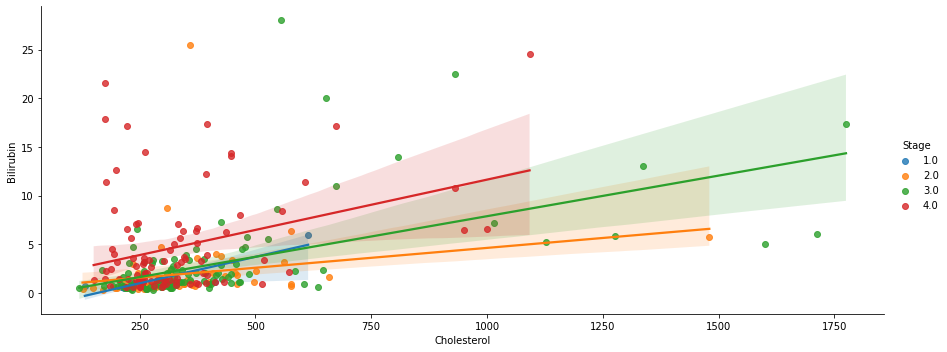

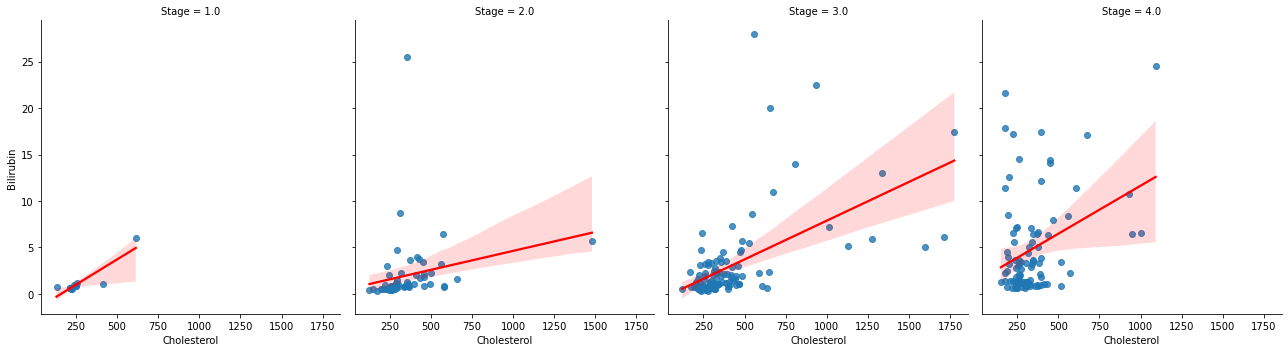

In [69]:
sns.lmplot(data=df, x='Cholesterol', y='Bilirubin', hue='Stage', aspect=2.5)
sns.lmplot(data=df, x='Cholesterol', y='Bilirubin', col ='Stage', aspect=0.9, line_kws={'color': 'red'})

plt.show()

In [73]:
lb = LabelEncoder()

df['Status'] = lb.fit_transform(df['Status'])
df['Drug'] = lb.fit_transform(df['Drug'])
df['Ascites'] = lb.fit_transform(df['Ascites'])
df['Hepatomegaly'] = lb.fit_transform(df['Hepatomegaly'])
df['Sex'] = lb.fit_transform(df['Sex'])
df['Spiders'] = lb.fit_transform(df['Spiders'])
df['Edema'] = lb.fit_transform(df['Edema'])
df['Drug'] = lb.fit_transform(df['Drug'])

df = df.drop(['ID','N_Days'],axis=1)

df.head(1)

,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,2,0,21464,0,1,1,1,2,14.5,261.0,2.6,156.0,1718.0,137.95,172.0,190.0,12.2,4.0


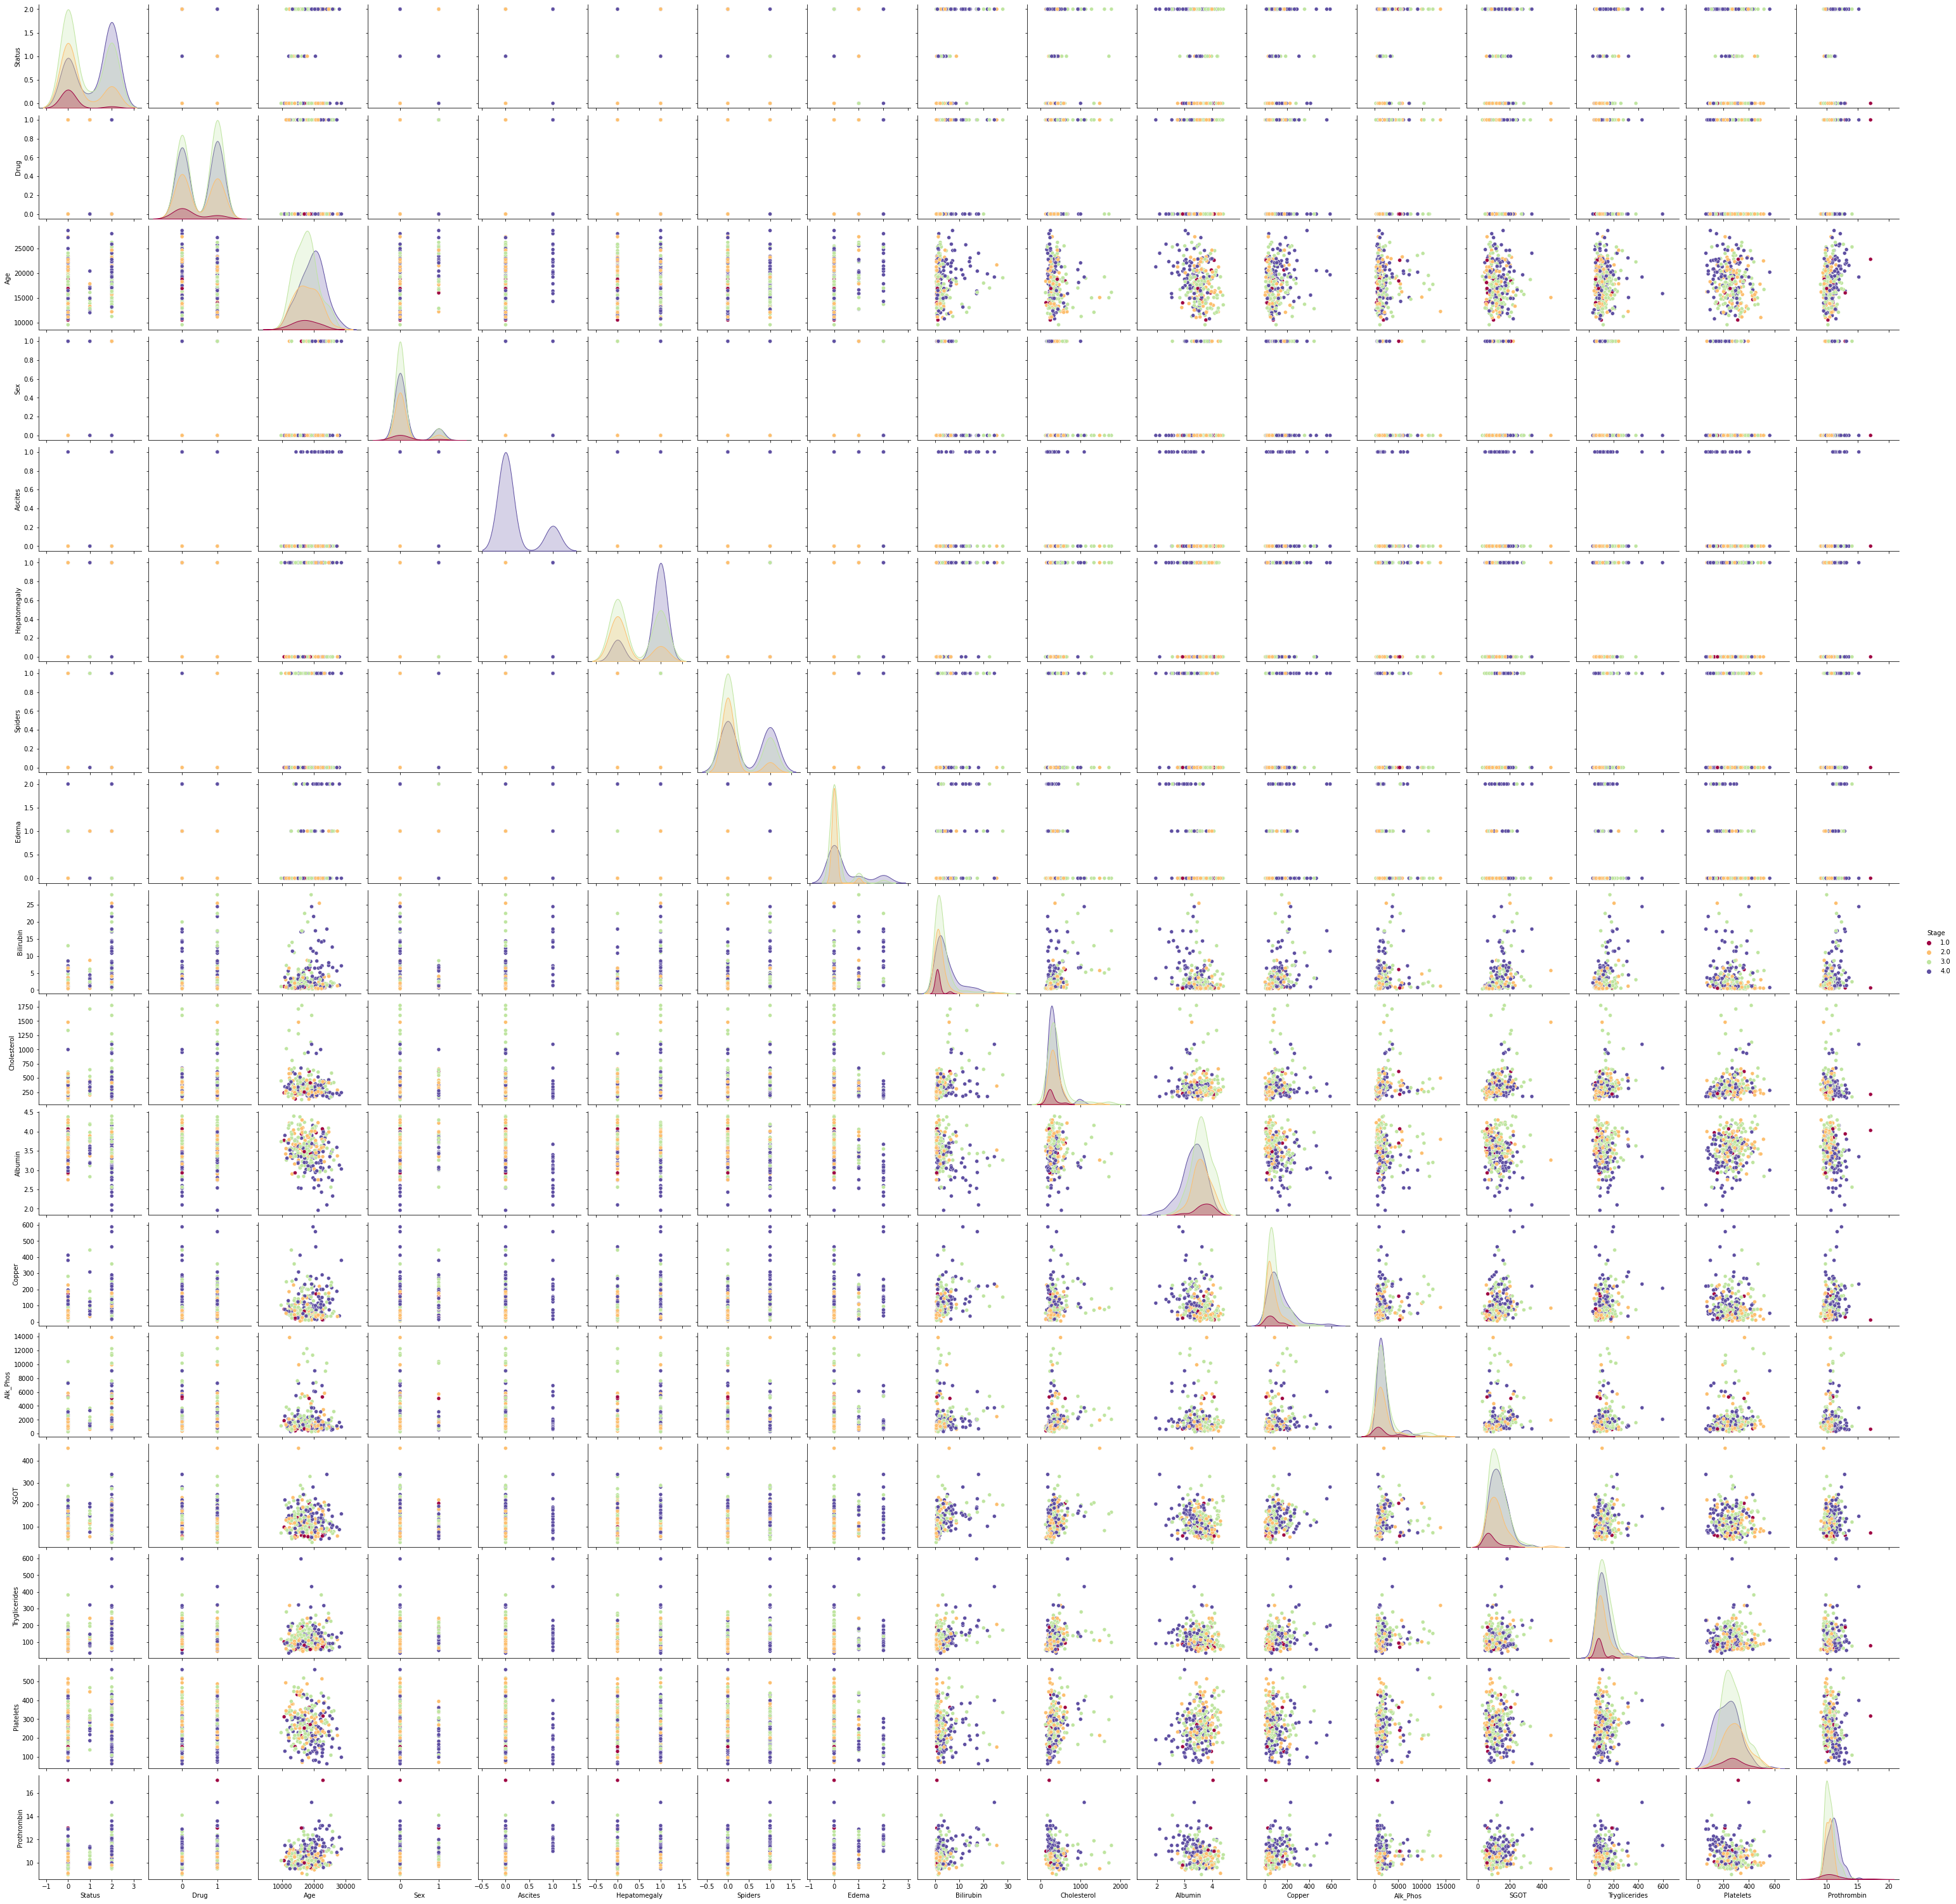

In [74]:
sns.pairplot(df, hue='Stage',palette='Spectral')
plt.show()

### Modeling and Evaluation

In [75]:
X_M = df.drop('Stage', axis = 1)
Y_M = df['Stage']
scaler = StandardScaler()
x = scaler.fit_transform(X_M)

### Train Test Split

In [76]:
X_train, X_test, y_train, y_test = train_test_split(x, Y_M, test_size=0.3, random_state=42)

### Logistic Regression

In [77]:
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)
logistic_model.score(X_train, y_train)
model_pred_L = logistic_model.predict(X_test)

print(classification_report(y_test, model_pred_L))
print("accuracy: ",accuracy_score(y_test, model_pred_L))
print("mean_absolute_error: ",mean_absolute_error(y_test, model_pred_L))
print("mean_squared_error: ",mean_squared_error(y_test, model_pred_L))

              precision    recall  f1-score   support

         1.0       0.25      0.33      0.29         3
         2.0       0.13      0.11      0.12        18
         3.0       0.56      0.56      0.56        36
         4.0       0.68      0.73      0.70        26

    accuracy                           0.51        83
   macro avg       0.40      0.43      0.42        83
weighted avg       0.49      0.51      0.50        83

accuracy:  0.5060240963855421
mean_absolute_error:  0.5903614457831325
mean_squared_error:  0.8072289156626506


### Random Forest Classifier

In [78]:
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)
random_forest_model.score(X_train, y_train)
model_pred_R = random_forest_model.predict(X_test)

print(classification_report(y_test, model_pred_R))
print("accuracy: ",accuracy_score(y_test, model_pred_R))
print("mean_absolute_error: ",mean_absolute_error(y_test, model_pred_R))
print("mean_squared_error: ",mean_squared_error(y_test, model_pred_R))

              precision    recall  f1-score   support

         1.0       1.00      0.33      0.50         3
         2.0       0.31      0.22      0.26        18
         3.0       0.45      0.47      0.46        36
         4.0       0.65      0.77      0.70        26

    accuracy                           0.51        83
   macro avg       0.60      0.45      0.48        83
weighted avg       0.50      0.51      0.49        83

accuracy:  0.5060240963855421
mean_absolute_error:  0.5301204819277109
mean_squared_error:  0.6024096385542169


### Decision Tree

In [79]:
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)
decision_tree_model.score(X_train, y_train)
model_pred_T = decision_tree_model.predict(X_test)

print(classification_report(y_test, model_pred_T))
print("accuracy: ",accuracy_score(y_test, model_pred_T))
print("mean_absolute_error: ",mean_absolute_error(y_test, model_pred_T))
print("mean_squared_error: ",mean_squared_error(y_test, model_pred_T))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         3
         2.0       0.30      0.39      0.34        18
         3.0       0.24      0.17      0.20        36
         4.0       0.48      0.62      0.54        26

    accuracy                           0.35        83
   macro avg       0.26      0.29      0.27        83
weighted avg       0.32      0.35      0.33        83

accuracy:  0.3493975903614458
mean_absolute_error:  0.7469879518072289
mean_squared_error:  0.963855421686747


### SVC

In [80]:
model_SVC = SVC(kernel = 'linear' ,random_state = 42)
model_SVC.fit(X_train, y_train)
model_SVC.score(X_train, y_train)
model_SVC_Pred = model_SVC.predict(X_test)

print(classification_report(y_test, model_SVC_Pred))
print("accuracy: ",accuracy_score(y_test, model_SVC_Pred))
print("mean_absolute_error: ",mean_absolute_error(y_test, model_SVC_Pred))
print("mean_squared_error: ",mean_squared_error(y_test, model_SVC_Pred))

              precision    recall  f1-score   support

         1.0       0.25      0.67      0.36         3
         2.0       0.21      0.17      0.19        18
         3.0       0.50      0.47      0.49        36
         4.0       0.63      0.65      0.64        26

    accuracy                           0.47        83
   macro avg       0.40      0.49      0.42        83
weighted avg       0.47      0.47      0.47        83

accuracy:  0.46987951807228917
mean_absolute_error:  0.6385542168674698
mean_squared_error:  0.8795180722891566


### KNeighbors Classifier

In [81]:
model_NEG = KNeighborsClassifier(n_neighbors=5)
model_NEG.fit(X_train, y_train)
model_NEG.score(X_train, y_train)
model_NEG_Pred = model_NEG.predict(X_test)

print(classification_report(y_test, model_NEG_Pred))
print("accuracy: ",accuracy_score(y_test, model_NEG_Pred))
print("mean_absolute_error: ",mean_absolute_error(y_test, model_NEG_Pred))
print("mean_squared_error: ",mean_squared_error(y_test, model_NEG_Pred))

              precision    recall  f1-score   support

         1.0       0.17      0.33      0.22         3
         2.0       0.33      0.33      0.33        18
         3.0       0.53      0.44      0.48        36
         4.0       0.66      0.73      0.69        26

    accuracy                           0.51        83
   macro avg       0.42      0.46      0.43        83
weighted avg       0.51      0.51      0.51        83

accuracy:  0.5060240963855421
mean_absolute_error:  0.5662650602409639
mean_squared_error:  0.7108433734939759


3.0    36
4.0    26
2.0    18
1.0     3
Name: Stage, dtype: int64


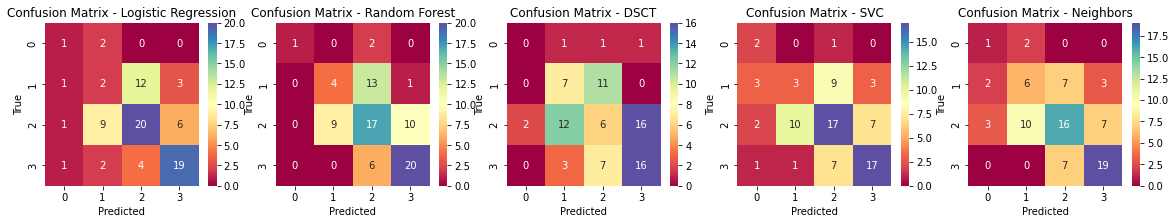

In [82]:
RLOG = confusion_matrix(y_test, model_pred_L)
RMFC = confusion_matrix(y_test, model_pred_R)
DSCT = confusion_matrix(y_test, model_pred_T)
SVC_ = confusion_matrix(y_test, model_SVC_Pred)
NEG = confusion_matrix(y_test, model_NEG_Pred)

fig, axes = plt.subplots(1, 5, figsize=(20, 3))

sns.heatmap(RLOG, annot=True, cmap='Spectral', fmt='g', ax=axes[0])
axes[0].set_title('Confusion Matrix - Logistic Regression')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')

sns.heatmap(RMFC, annot=True, cmap='Spectral', fmt='g', ax=axes[1])
axes[1].set_title('Confusion Matrix - Random Forest')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')

sns.heatmap(DSCT, annot=True, cmap='Spectral', fmt='g', ax=axes[2])
axes[2].set_title('Confusion Matrix - DSCT')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('True')

sns.heatmap(SVC_, annot=True, cmap='Spectral', fmt='g', ax=axes[3])
axes[3].set_title('Confusion Matrix - SVC')
axes[3].set_xlabel('Predicted')
axes[3].set_ylabel('True')

sns.heatmap(NEG, annot=True, cmap='Spectral', fmt='g', ax=axes[4])
axes[4].set_title('Confusion Matrix - Neighbors')
axes[4].set_xlabel('Predicted')
axes[4].set_ylabel('True')

print(y_test.value_counts())
plt.show()

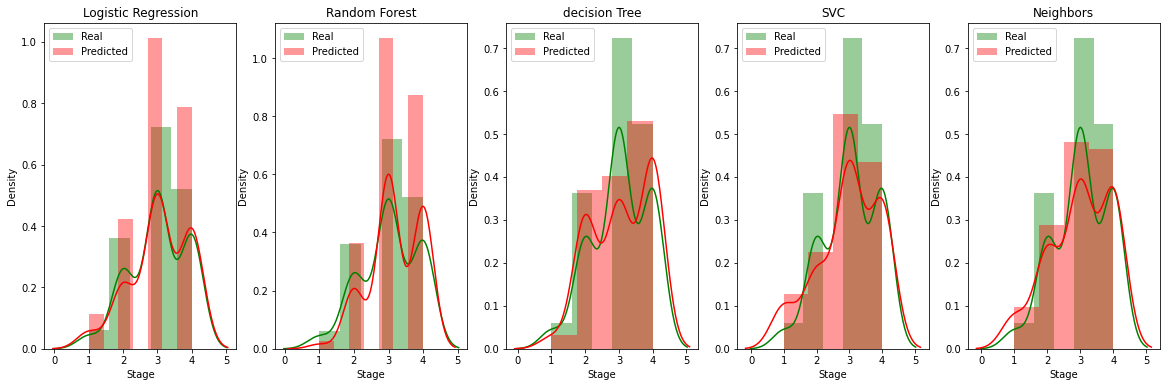

In [83]:
fig, ax = plt.subplots(1, 5, figsize=(20, 6))

sns.distplot(y_test, label='Real', ax=ax[0], color = 'Green')
sns.distplot(model_pred_L, label='Predicted', ax=ax[0],  color = 'red')

sns.distplot(y_test, label='Real', ax=ax[1], color = 'Green')
sns.distplot(model_pred_R, label='Predicted', ax=ax[1], color = 'red')

sns.distplot(y_test, label='Real', ax=ax[2], color = 'Green')
sns.distplot(model_pred_T, label='Predicted', ax=ax[2], color = 'red')

sns.distplot(y_test, label='Real', ax=ax[3], color = 'Green')
sns.distplot(model_SVC_Pred, label='Predicted', ax=ax[3], color = 'red')

sns.distplot(y_test, label='Real', ax=ax[4], color = 'Green')
sns.distplot(model_NEG_Pred, label='Predicted', ax=ax[4], color = 'red')


ax[0].set_title('Logistic Regression')
ax[1].set_title('Random Forest')
ax[2].set_title('decision Tree')
ax[3].set_title('SVC')
ax[4].set_title('Neighbors')

ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()
ax[4].legend()
plt.show()